Aquí se realizará el entrenamiento de modelos capaces de predecir los Y

In [10]:
import pandas as pd 
import numpy as np

import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

import sys
sys.path.append('../')
from Utils import utils_nn as utlnn

In [2]:
x_test = pd.read_excel("../Train_Test/Dataset_Separado/x_test_new.xlsx")
x_train = pd.read_excel("../Train_Test/Dataset_Separado/x_train_new.xlsx")
y_test = pd.read_excel("../Train_Test/Dataset_Separado/y_test_new.xlsx")
y_train = pd.read_excel("../Train_Test/Dataset_Separado/y_train_new.xlsx")


In [4]:
## De mi y_train y y_test solo quiero las coordenadas Y
R0= 6.371E6 # [m]

out_y_coord = [f'y_{i}' for i in range(1,101)]
y_train_y = y_train[out_y_coord]/R0
y_test_y = y_test[out_y_coord]/R0
# 'y_test_y son las columnas filtradas de las 3 coordenadas'


In [5]:
print("Forma de x_train:", x_train.shape)

for i, col_name in enumerate(x_train.columns):
    col = x_train[col_name]
    print(f"Columna {i} ({col_name}): min={col.min():.4f}, max={col.max():.4f}, mean={col.mean():.4f}, std={col.std():.4f}")


Forma de x_train: (4104, 9)
Columna 0 (latitude_pos_tx): min=-42.2800, max=-42.2800, mean=-42.2800, std=0.0000
Columna 1 (longitude_pos_tx): min=-63.4000, max=-63.4000, mean=-63.4000, std=0.0000
Columna 2 (elevation_pos_tx): min=0.0000, max=0.0000, mean=0.0000, std=0.0000
Columna 3 (fc [Mhz]): min=3.0000, max=30.0000, mean=13.7032, std=6.9191
Columna 4 (elevation): min=0.0000, max=40.0000, mean=13.6659, std=11.8820
Columna 5 (azimuth): min=87.0000, max=98.0000, mean=92.8209, std=4.5824
Columna 6 (year): min=2010.0000, max=2010.0000, mean=2010.0000, std=0.0000
Columna 7 (mmdd): min=101.0000, max=1231.0000, mean=985.1394, std=348.8719
Columna 8 (hour): min=0.0000, max=20.0000, mean=11.1647, std=4.5880


In [6]:
x_train = x_train.drop(columns = ['latitude_pos_tx', 'longitude_pos_tx', 'elevation_pos_tx', 'year'])
x_test = x_test.drop(columns =['latitude_pos_tx', 'longitude_pos_tx', 'elevation_pos_tx', 'year'])

In [16]:
#Normalizamos la salida
from sklearn.preprocessing import MinMaxScaler

scaler_y = MinMaxScaler()
y_train_y_scaled = scaler_y.fit_transform(y_train_y)
y_test_y_scaled = scaler_y.transform(y_test_y)

los Epoch van en un rango de: 400 a 1500
los Batch Size van en un rango de: 70 a 130 (Puede cambiar dependiendo la salida)

In [ ]:
# epoch = 1500 #920
# b_s = 70
# act_name = 'relu'
# l2_reg = 0.00
# while epoch <= 1500:
#   while b_s <= 130:
    
#     inputs = Input(shape=(9,))
#     encoded = Dense(9, activation= act_name, kernel_regularizer= l2(l2_reg))(inputs)
#     encoded = Dense(16, activation= act_name, kernel_regularizer= l2(l2_reg))(encoded)
#     encoded = Dense(32, activation= act_name, kernel_regularizer= l2(l2_reg))(encoded)
#     encoded = Dense(64, activation= act_name, kernel_regularizer= l2(l2_reg))(encoded)
#     encoded = Dense(80, activation= act_name, kernel_regularizer= l2(l2_reg))(encoded)
#     encoded = Dense(90, activation= act_name, kernel_regularizer= l2(l2_reg))(encoded)
#     decoded = Dense(100, activation= 'linear', kernel_regularizer= l2(l2_reg), name ='y_output')(encoded)

#     autoencoder_y = Model(inputs, decoded)
#     autoencoder_y.compile(optimizer = 'adam', loss= 'mse')
#     autoencoder_y.summary()

#     history = autoencoder_y.fit(x_train,y_train_y,
#                                 epochs = epoch,
#                                 batch_size = b_s,
#                                 validation_split = 0.1)
    
#     loss = autoencoder_y.evaluate(x_test,y_test_y)

#     if loss <= 35:
#       autoencoder_y.save(f'../modelos_entrenamiento/modelos_y/mod_y_{epoch}_{b_s}_vs10_Adam_loss_{round(loss)}.keras')
#     print(f'Pérdida en datos de Test: {loss} epoch: {epoch}, batch_size: {b_s}')
#     b_s +=20
#   b_s = 80
#   epoch +=40

In [11]:
early_stopping = EarlyStopping(
  monitor = 'val_loss',	#monitoriamos la pérdida en validación
  patience = 30, # Si no mejora en 10->20 epochs, detenemos el entrenamiento.
  restore_best_weights = True # Restaura los mejores pesos encontrados.
)
reduce_lr = ReduceLROnPlateau(
  monitor = 'val_loss',
  patience = 20,
  factor = 0.5
)

In [42]:
from tensorflow.keras.optimizers import Adam, AdamW, RMSprop, Nadam, SGD

#def
act_name = "relu"
l2_reg = 0.0  
epoch = 600
b_s = 32
optimizer_name = Adam(learning_rate=1e-3)

inputs = Input(shape=(5,))
# encoded = Dense(9, activation= act_name, kernel_regularizer= l2(l2_reg))(inputs)
# encoded = Dense(16, activation= act_name, kernel_regularizer= l2(l2_reg))(encoded)
encoded = Dense(32, activation= act_name, kernel_regularizer= l2(l2_reg))(inputs)
# encoded = Dense(64, activation= act_name, kernel_regularizer= l2(l2_reg))(encoded)
encoded = Dense(80, activation= act_name, kernel_regularizer= l2(l2_reg))(encoded)
# encoded = Dense(90, activation= act_name, kernel_regularizer= l2(l2_reg))(encoded)
encoded = Dense(128, activation=act_name, kernel_regularizer=l2(l2_reg))(encoded)
encoded = Dense(256, activation=act_name, kernel_regularizer=l2(l2_reg))(encoded)
decoded = Dense(100, activation= 'linear', kernel_regularizer= l2(l2_reg), name ='y_output')(encoded)

autoencoder_y = Model(inputs, decoded)
autoencoder_y.compile(optimizer = optimizer_name , loss= 'mae')
autoencoder_y.summary()

history = autoencoder_y.fit(x_train,y_train_y_scaled,
														epochs = epoch,
														batch_size = b_s,
														validation_split = 0.1,
                            callbacks = [reduce_lr]
                            )


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 5)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │           192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 80)             │         2,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │        10,368 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ y_output (Dense)                │ (None, 100)            │        25,700 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 71,924 (280.95 KB)

 Trainable params: 71,924 (280.95 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/600
116/116 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - loss: 4.2387 - val_loss: 0.2247 - learning_rate: 0.0010
Epoch 2/600
116/116 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.2077 - val_loss: 0.1855 - learning_rate: 0.0010
Epoch 3/600
116/116 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1539 - val_loss: 0.1521 - learning_rate: 0.0010
Epoch 4/600
116/116 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1505 - val_loss: 0.1261 - learning_rate: 0.0010
Epoch 5/600
116/116 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1165 - val_loss: 0.1192 - learning_rate: 0.0010
Epoch 6/600
116/116 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1147 - val_loss: 0.1234 - learning_rate: 0.0010
Epoch 7/600
116/116 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1095 - val_loss: 0.1079 - learning_rate: 0.0010
Epoch 8/600
116/116 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1048 - val_loss: 0.1032 - learning_rate: 0.0010
Epoch 9/600
116/116 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1005 - val_loss: 0.0918 - learning_rate: 0.0010


In [14]:
loss = autoencoder_y.evaluate(x_test,y_test_y_scaled)
print(f'Pérdida en datos de Test: {loss}')



33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0108
Pérdida en datos de Test: 0.010964074172079563


In [35]:
idx = 1000
# Elegir una muestra para comparar (observar luego la muestra 30)

# Predicción de una muestra 
y_pred_scaled = autoencoder_y.predict(np.expand_dims(x_test.iloc[idx], axis=0))
###############################################
y_true = y_test_y.iloc[idx].to_numpy() # Se obtine Algo de tipo Serie pass to Numpy

y_pred = scaler_y.inverse_transform(y_pred_scaled)
y_pred = y_pred.flatten() # [[...,...,...,....,]]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 613ms/step


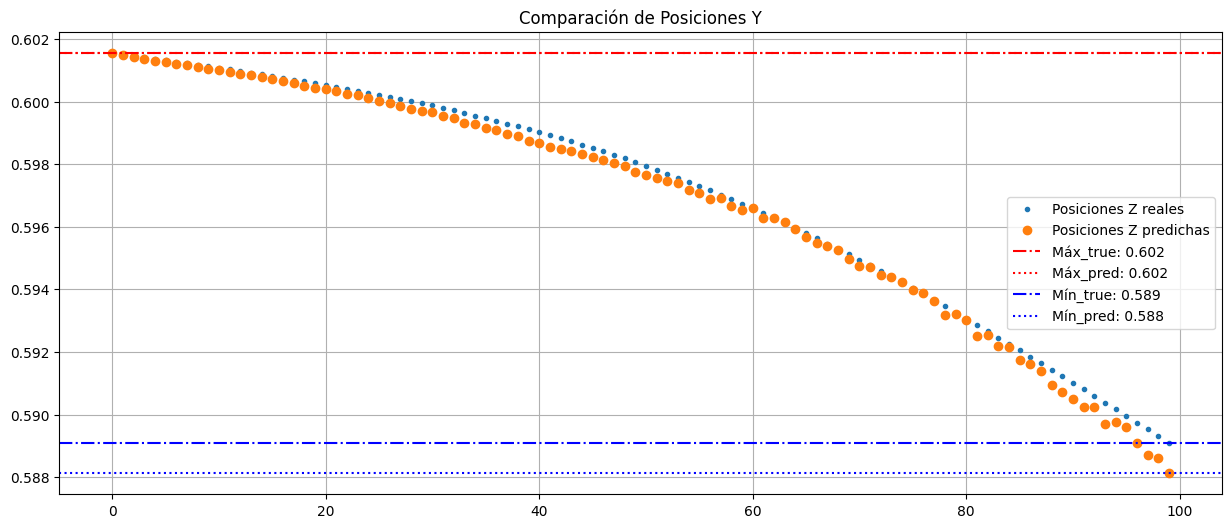

In [36]:
##Graficamos 
# Buscamos los máximos y mínimos 
y_true_max = np.max(y_true)
y_true_min = np.min(y_true)

y_pred_max = np.max(y_pred)
y_pred_min = np.min(y_pred)

# Pos y
plt.figure(figsize=(15, 6))
plt.plot(y_true, label='Posiciones Z reales', linestyle='None', marker='.')
plt.plot(y_pred, label='Posiciones Z predichas', linestyle = 'None',marker='o')
# Dibujamos los max y min
plt.axhline(y = y_true_max, color = 'red', linestyle = '-.', label=f'Máx_true: {y_true_max:.3f}')
plt.axhline(y = y_pred_max, color = 'red', linestyle = ':', label= f'Máx_pred: {y_pred_max:.3f}')
plt.axhline(y = y_true_min, color = 'blue', linestyle ='-.', label=f'Mín_true: {y_true_min:.3f}')
plt.axhline(y = y_pred_min, color = 'blue', linestyle = ':',label= f'Mín_pred:{y_pred_min: .3f}')

# plt.ylim(-35,-50) ##(-60,-30)
plt.title('Comparación de Posiciones Y')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
save_model = False

if save_model == True:
  autoencoder_y.save('../modelos_entrenamiento/mod_y_R0/mod_y_427_32_vs10_adamW_l2_0.keras')


In [ ]:
autoencoder_y.save("../modelos_entrenamiento/mod_y_R0/modelo1_y_con_scaler/modelo1_y.keras")

In [41]:
import pickle

with open("../modelos_entrenamiento/mod_y_R0/modelo1_y_con_scaler/scaler_y1.pkl","wb") as f:
	pickle.dump(scaler_y,f)